In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.losses import mean_absolute_percentage_error

Using TensorFlow backend.


In [2]:
# watch for any changes in the utils module, and reload it automatically
%load_ext autoreload
%autoreload 2

In [3]:
from utils.generate_models import generate_models, generate_DeepConvLSTM_model
from utils.validate_models import find_best_architecture, evaluate_model, evaluate_plot
from utils.data_generator import DataGenerator
from utils.get_dataset_pulsi import get_dataset_pulsi

In [4]:
columns = np.array(['bpm', 'spo2'])
dataset_reduced_std, dataset_reduced = get_dataset_pulsi(columns,
                                                         filename='./utils/test_data/42nights.csv')

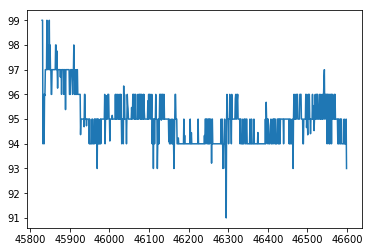

In [5]:
plt.plot(dataset_reduced[dataset_reduced["name"] == 'h_17-04-27']["spo2"])

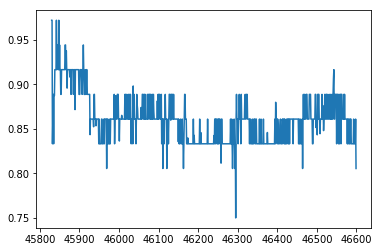

In [6]:
plt.plot(dataset_reduced_std[dataset_reduced_std["name"] == 'h_17-04-27']["spo2"])

In [7]:
window_size = 12            # ventana de valores para la prediccion
dim_length = window_size
number_of_predictions = 4   # numero de predicciones en la salida
output_dim = number_of_predictions
target_variable = "spo2"
dim_channels = 2            # 2 variables

In [8]:
#cv_fold_size = len(val_gen)*batch_size
batch_size = 32
metric = mean_absolute_percentage_error

In [9]:
train_names_reduced = np.array(['p_17-01-19', 'p_17-01-20'])
val_names_reduced = np.array(['p_17-01-23'])
test_names_reduced = np.array(['p_17-01-24'])
train_gen_reduced = DataGenerator(dataset_reduced_std, train_names_reduced,
                                  "spo2", batch_size=batch_size,
                                  number_of_predictions=number_of_predictions,
                                  window_size=window_size,
                                  step_prediction_dates=1, shuffle=False,
                                  rebalance_data=True, rebalance_threshold=0.5,
                                  debug=False)
val_gen_reduced = DataGenerator(dataset_reduced_std, val_names_reduced,
                                "spo2", batch_size=batch_size,
                                number_of_predictions=number_of_predictions,
                                window_size=window_size,
                                step_prediction_dates=1, shuffle=False,
                                rebalance_data=True, rebalance_threshold=0.5,
                                debug=False)
test_gen_reduced = DataGenerator(dataset_reduced_std, test_names_reduced,
                                 "spo2", batch_size=batch_size,
                                 number_of_predictions=number_of_predictions,
                                 window_size=window_size,
                                 step_prediction_dates=1, shuffle=False,
                                 rebalance_data=False, debug=False)

In [10]:
print(len(train_gen_reduced)*batch_size)
print(len(train_gen_reduced.get_minority_datetimes()))
print(len(val_gen_reduced)*batch_size)
print(len(val_gen_reduced.get_minority_datetimes()))

2496
20
1152
36


In [11]:
# simple
hyperparameters_simple = {}
regularization_rate_simple = 10 ** -4 # max bound
hyperparameters_simple['regularization_rate'] = regularization_rate_simple
learning_rate_simple = 10 ** -4 # max bound
hyperparameters_simple['learning_rate'] = learning_rate_simple
filters_simple = []
hyperparameters_simple['filters'] = filters_simple
lstm_dims_simple = [100]
hyperparameters_simple['lstm_dims'] = lstm_dims_simple

dropout_rnn_simple = 0.75
dropout_cnn_simple = 0.75

nrepochs_simple = 150

In [12]:
model = generate_DeepConvLSTM_model(dim_length, dim_channels, output_dim,
                                    filters_simple, lstm_dims_simple, learning_rate_simple,
                                    regularization_rate_simple, dropout=None,
                                    dropout_rnn=dropout_rnn_simple, dropout_cnn=dropout_cnn_simple,
                                    metrics=[mean_absolute_percentage_error])

models_simple = [(model, hyperparameters_simple)]

In [13]:
# in this case, find_best_architecture is only used for training the model
np.random.seed(3)
verbose=True
early_stopping=False

best_model_losses, best_params_losses, best_model_metrics, best_params_metrics, debug = \
    find_best_architecture(train_gen_reduced, val_gen_reduced, test_gen_reduced,
                           verbose=False, number_of_models=None, nr_epochs=nrepochs_simple,
                           early_stopping=True, batch_size=batch_size,
                           models=models_simple, metric=mean_absolute_percentage_error, use_testset=True,
                           debug=False, test_retrain=False, output_all=True)

In [14]:
train_predict, val_predict, test_predict = \
    evaluate_model(train_gen_reduced, val_gen_reduced, test_gen_reduced,
                   best_model_losses)

training error = [0.0355095869073501, 17980076.089743588]
validation error = [0.031362803601142436, 25.208706272972954]
testing error = [0.004987999075402816, 5.229486328125]


In [15]:
# from GC_find_best_arch_250_rnn_1_pulsi_rebalance / losses
hyperparameters_losses = {}
regularization_rate_losses = 0.0002
hyperparameters_losses['regularization_rate'] = regularization_rate_losses
learning_rate_losses = 0.003
hyperparameters_losses['learning_rate'] = learning_rate_losses
filters_losses = []
hyperparameters_losses['filters'] = filters_losses
lstm_dims_losses = [17]
hyperparameters_losses['lstm_dims'] = lstm_dims_losses

dropout_rnn_losses = 0.84
dropout_cnn_losses = None

nrepochs_losses = 52

In [29]:
# from GC_find_best_arch_250_rnn_1_pulsi_rebalance / metrics
hyperparameters_losses = {}
regularization_rate_losses = 0.0004
hyperparameters_losses['regularization_rate'] = regularization_rate_losses
learning_rate_losses = 0.0008
hyperparameters_losses['learning_rate'] = learning_rate_losses
filters_losses = []
hyperparameters_losses['filters'] = filters_losses
lstm_dims_losses = [12]
hyperparameters_losses['lstm_dims'] = lstm_dims_losses

dropout_rnn_losses = 0.30
dropout_cnn_losses = None

nrepochs_losses = 66

In [15]:
# from GC_find_best_arch_250_rnn_1_cnn_1_pulsi_rebalance / lossses
hyperparameters_losses = {}
regularization_rate_losses = 0.0002
hyperparameters_losses['regularization_rate'] = regularization_rate_losses
learning_rate_losses = 0.00014
hyperparameters_losses['learning_rate'] = learning_rate_losses
filters_losses = [40]
hyperparameters_losses['filters'] = filters_losses
lstm_dims_losses = [52]
hyperparameters_losses['lstm_dims'] = lstm_dims_losses

dropout_rnn_losses = 0.74
dropout_cnn_losses = 0.87

nrepochs_losses = 193

In [15]:
# from GC_find_best_arch_250_rnn_1_cnn_1_pulsi_rebalance / metrics (MAPE)
hyperparameters_losses = {}
regularization_rate_losses = 0.0002
hyperparameters_losses['regularization_rate'] = regularization_rate_losses
learning_rate_losses = 0.0001
hyperparameters_losses['learning_rate'] = learning_rate_losses
filters_losses = [33]
hyperparameters_losses['filters'] = filters_losses
lstm_dims_losses = [78]
hyperparameters_losses['lstm_dims'] = lstm_dims_losses

dropout_rnn_losses = 0.72
dropout_cnn_losses = 0.81

nrepochs_losses = 192

In [15]:
# from GC_find_best_arch_250_rnn_2_cnn_2_pulsi / metrics (MAPE)
hyperparameters_losses = {}
regularization_rate_losses = 0.01
hyperparameters_losses['regularization_rate'] = regularization_rate_losses
learning_rate_losses = 0.00075
hyperparameters_losses['learning_rate'] = learning_rate_losses
filters_losses = [58, 78]
hyperparameters_losses['filters'] = filters_losses
lstm_dims_losses = [34]
hyperparameters_losses['lstm_dims'] = lstm_dims_losses

dropout_rnn_losses = 0.34
dropout_cnn_losses = 0.66

nrepochs_losses = 108

In [15]:
# from GC_find_best_arch_250_rnn_3_cnn_3_pulsi / losses
hyperparameters_losses = {}
regularization_rate_losses = 0.0006
hyperparameters_losses['regularization_rate'] = regularization_rate_losses
learning_rate_losses = 0.024
hyperparameters_losses['learning_rate'] = learning_rate_losses
filters_losses = [46, 12]
hyperparameters_losses['filters'] = filters_losses
lstm_dims_losses = [33, 41, 14]
hyperparameters_losses['lstm_dims'] = lstm_dims_losses

dropout_rnn_losses = 0.40
dropout_cnn_losses = 0.255

nrepochs_losses = 50

In [15]:
# from GC_find_best_arch_250_rnn_4_cnn_4_pulsi / metric
hyperparameters_losses = {}
regularization_rate_losses = 0.031
hyperparameters_losses['regularization_rate'] = regularization_rate_losses
learning_rate_losses = 0.0007
hyperparameters_losses['learning_rate'] = learning_rate_losses
filters_losses = [63, 33, 40, 98]
hyperparameters_losses['filters'] = filters_losses
lstm_dims_losses = [77]
hyperparameters_losses['lstm_dims'] = lstm_dims_losses

dropout_rnn_losses = 0.61
dropout_cnn_losses = 0.43

nrepochs_losses = 89

In [16]:
model = generate_DeepConvLSTM_model(dim_length, dim_channels, output_dim,
                                    filters_losses, lstm_dims_losses, learning_rate_losses,
                                    regularization_rate_losses, dropout=None,
                                    dropout_rnn=dropout_rnn_losses, dropout_cnn=dropout_cnn_losses,
                                    metrics=[mean_absolute_percentage_error])
models_losses = [(model, hyperparameters_losses)]

In [17]:
# in this case, find_best_architecture is only used for training the model
np.random.seed(3)
verbose=True
early_stopping=False

best_model_losses, best_params_losses, best_model_metrics, best_params_metrics, debug = \
    find_best_architecture(train_gen_reduced, val_gen_reduced, test_gen_reduced,
                           verbose=False, number_of_models=None, nr_epochs=nrepochs_losses,
                           early_stopping=True, batch_size=batch_size,
                           models=models_losses, metric=mean_absolute_percentage_error, use_testset=True,
                           debug=False, test_retrain=False, output_all=True)

In [18]:
# results for GC_find_best_arch_250_rnn_1_pulsi_rebalance / losses
train_predict, val_predict, test_predict = \
    evaluate_model(train_gen_reduced, val_gen_reduced, test_gen_reduced,
                   best_model_losses)

training error = [0.02677749527188448, 16118475.25]
validation error = [0.0281679663910634, 25.016911135779488]
testing error = [0.00406279060534305, 5.6296428820292155]


In [32]:
# results for GC_find_best_arch_250_rnn_1_pulsi_rebalance / metrics
train_predict, val_predict, test_predict = \
    evaluate_model(train_gen_reduced, val_gen_reduced, test_gen_reduced,
                   best_model_losses)

training error = [0.02768795509846547, 16433831.108974358]
validation error = [0.030320135410875082, 25.035001436869305]
testing error = [0.003372180883048309, 3.5689883202446833]


In [18]:
# results for GC_find_best_arch_250_rnn_1_cnn_1_pulsi_rebalance / lossses
train_predict, val_predict, test_predict = \
    evaluate_model(train_gen_reduced, val_gen_reduced, test_gen_reduced,
                   best_model_losses)

training error = [0.02660321893218236, 15183669.948717948]
validation error = [0.03076387657266524, 25.528309451209175]
testing error = [0.0035477529743479356, 3.196770892461141]


In [18]:
# results for GC_find_best_arch_250_rnn_1_cnn_1_pulsi_rebalance / metrics
train_predict, val_predict, test_predict = \
    evaluate_model(train_gen_reduced, val_gen_reduced, test_gen_reduced,
                   best_model_losses)

training error = [0.022842249928567655, 11667547.278846154]
validation error = [0.03039985103532672, 24.74775701098972]
testing error = [0.004394486421512233, 3.7024138908386233]


In [18]:
# results for GC_find_best_arch_250_rnn_2_cnn_2_pulsi / metrics
train_predict, val_predict, test_predict = \
    evaluate_model(train_gen_reduced, val_gen_reduced, test_gen_reduced,
                   best_model_losses)

training error = [0.007144125470987115, 3629835.8958333335]
validation error = [0.039504802889294095, 27.414820512135822]
testing error = [0.006312266101439794, 2.457550123002794]


In [18]:
# results for GC_find_best_arch_250_rnn_3_cnn_3_pulsi / losses
train_predict, val_predict, test_predict = \
    evaluate_model(train_gen_reduced, val_gen_reduced, test_gen_reduced,
                   best_model_losses)

training error = [0.012790429202887492, 4667160.584935897]
validation error = [0.042607171978387565, 26.83086723751492]
testing error = [0.010476135007209248, 2.9867611334058974]


In [18]:
# results for GC_find_best_arch_250_rnn_4_cnn_4_pulsi / losses
train_predict, val_predict, test_predict = \
    evaluate_model(train_gen_reduced, val_gen_reduced, test_gen_reduced,
                   best_model_losses)

training error = [0.012399009870699583, 6048174.721153846]
validation error = [0.04843275466312965, 28.9890333281623]
testing error = [0.010534591793186134, 3.0693692504035104]


In [19]:
# full dataset
train_names = np.array(['p_17-01-19', 'p_17-01-20', 'p_17-01-21', 'p_17-01-22', 'p_17-01-23', 'p_17-01-24', 'p_17-01-25',
                        'p_17-01-26', 'p_17-01-27', 'p_17-01-28', 'p_17-01-29', 'p_17-01-30', 'p_17-01-31', 'p_17-02-01',
                        'p_17-02-02', 'p_17-02-03', 'p_17-02-04', 'p_17-02-05', 'p_17-02-06', 'p_17-02-07', 'p_17-02-08',
                        'p_17-02-09', 'p_17-02-10'])
val_names = np.array(['p_17-02-11', 'p_17-02-12', 'p_17-02-13', 'p_17-02-14', 'p_17-02-15', 'p_17-02-16', 'p_17-02-17', 'p_17-02-18'])
test_names = np.array(['p_17-02-19', 'p_17-02-20', 'p_17-02-21', 'p_17-02-22', 'p_17-02-23', 'p_17-02-24', 'p_17-02-25', 'p_17-04-27'])
train_gen = DataGenerator(dataset_reduced_std, train_names,
                          "spo2", batch_size=batch_size,
                          number_of_predictions=number_of_predictions,
                          window_size=window_size,
                          step_prediction_dates=1, shuffle=False,
                          rebalance_data=True, rebalance_threshold=0.5,
                          debug=False)
val_gen = DataGenerator(dataset_reduced_std, val_names,
                        "spo2", batch_size=batch_size,
                        number_of_predictions=number_of_predictions,
                        window_size=window_size,
                        step_prediction_dates=1, shuffle=False,
                        rebalance_data=True, rebalance_threshold=0.5,
                        debug=False)
test_gen = DataGenerator(dataset_reduced_std, test_names,
                         "spo2", batch_size=batch_size,
                         number_of_predictions=number_of_predictions,
                         window_size=window_size,
                         step_prediction_dates=1, shuffle=False,
                         rebalance_data=False,
                         debug=False)

In [20]:
print(len(train_gen)*batch_size)
print(len(train_gen.get_minority_datetimes()))
print(len(val_gen)*batch_size)
print(len(val_gen.get_minority_datetimes()))

26432
234
9504
68


In [21]:
# in this case, find_best_architecture is only used for training the model
np.random.seed(3)
verbose=True
early_stopping=False

best_model_losses, best_params_losses, best_model_metrics, best_params_metrics, debug = \
    find_best_architecture(train_gen, val_gen, test_gen,
                           verbose=True, number_of_models=None, nr_epochs=500, # let early stopping decide
                           early_stopping=True, batch_size=batch_size,
                           models=models_losses, metric=mean_absolute_percentage_error, use_testset=True,
                           debug=False, test_retrain=False, output_all=True)

Training model 0
{'regularization_rate': 0.0002, 'learning_rate': 0.003, 'filters': [], 'lstm_dims': [17]}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_2 (Batch (None, 12, 2)             8         
_________________________________________________________________
lstm_2 (LSTM)                (None, 12, 17)            1360      
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 17)            0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 12, 4)             72        
_________________________________________________________________
lambda_2 (Lambda)            (None, 4)                 0         
Total params: 1,440
Trainable params: 1,436
Non-trainable params: 4
_________________________________________________________________
Epoch 1/500
826/826 [============

In [22]:
# results for GC_find_best_arch_250_rnn_1_pulsi_rebalance / losses
train_predict, val_predict, test_predict = \
    evaluate_model(train_gen_reduced, val_gen_reduced, test_gen_reduced,
                   best_model_losses)

training error = [0.03544703028045404, 19228561.230769232]
validation error = [0.026290440414514806, 24.169242752922905]
testing error = [0.00416293870140281, 6.078246647728814]


In [36]:
# results for GC_find_best_arch_250_rnn_1_pulsi_rebalance / metrics
train_predict, val_predict, test_predict = \
    evaluate_model(train_gen, val_gen, test_gen,
                   best_model_losses)

training error = [0.02050680126070291, 1240517.3724826588]
validation error = [0.02131436028916025, 17.130954225456673]
testing error = [0.0045836071455451705, 4.89058465535775]


In [27]:
# results for GC_find_best_arch_250_rnn_1_cnn_1_pulsi_rebalance / losses
train_predict, val_predict, test_predict = \
    evaluate_model(train_gen, val_gen, test_gen,
                   best_model_losses)

training error = [0.02381990463236126, 875825.3857024114]
validation error = [0.019089871042279483, 16.642975457188257]
testing error = [0.004334271024593, 5.093053975501585]


In [23]:
# results for GC_find_best_arch_250_rnn_1_cnn_1_pulsi / metrics
train_predict, val_predict, test_predict = \
    evaluate_model(train_gen, val_gen, test_gen,
                   best_model_losses)

training error = [0.003938880632913358, 569377.7372120708]
validation error = [0.02409494689568526, 17.976693040995485]
testing error = [0.004958599644935323, 4.8252417439110475]


In [22]:
# results for GC_find_best_arch_250_rnn_2_cnn_2_pulsi / metrics
train_predict, val_predict, test_predict = \
    evaluate_model(train_gen, val_gen, test_gen,
                   best_model_losses)

training error = [0.013877629461420867, 804774.5821229165]
validation error = [0.027929954161798512, 17.259500298034464]
testing error = [0.009675111871402482, 4.12370548864472]


In [26]:
# results for GC_find_best_arch_250_rnn_3_cnn_3_pulsi / losses
train_predict, val_predict, test_predict = \
    evaluate_model(train_gen, val_gen, test_gen,
                   best_model_losses)

training error = [0.029506070151492123, 1556520.3740879248]
validation error = [0.020199085990286837, 16.7002499801944]
testing error = [0.005257628673522786, 5.103903836615923]


In [22]:
# results for GC_find_best_arch_250_rnn_4_cnn_4_pulsi / losses
train_predict, val_predict, test_predict = \
    evaluate_model(train_gen, val_gen, test_gen,
                   best_model_losses)

training error = [0.02016231472903894, 1163866.7292111735]
validation error = [0.022170260178571197, 16.918399062622274]
testing error = [0.00649275392740865, 4.635836825946061]


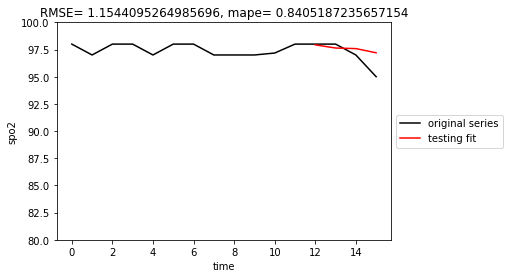

(1.1544095264985696, 0.8405187235657154)

In [26]:
from utils.validate_models import mape
evaluate_plot(dataset_reduced, test_gen, test_predict,
              target_variable=target_variable, metric=mape,
              prediction=0)

371


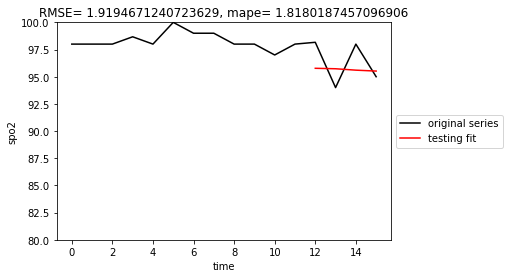

372


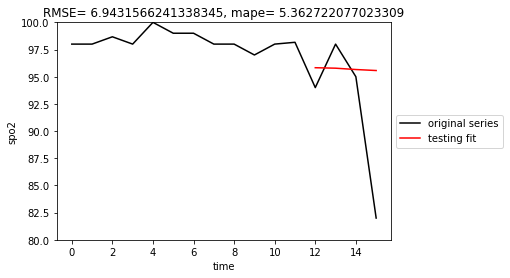

373


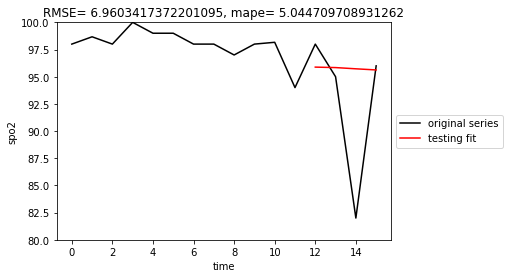

374


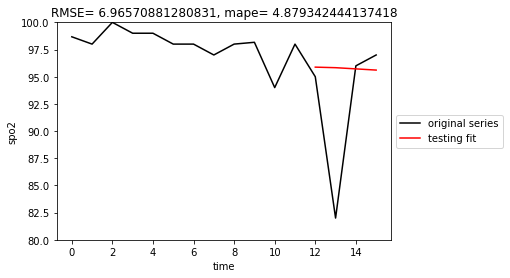

375


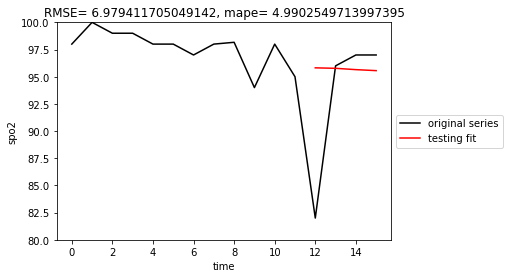

376


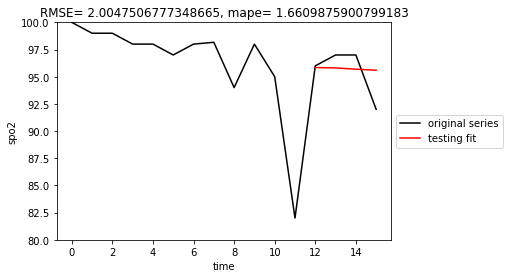

377


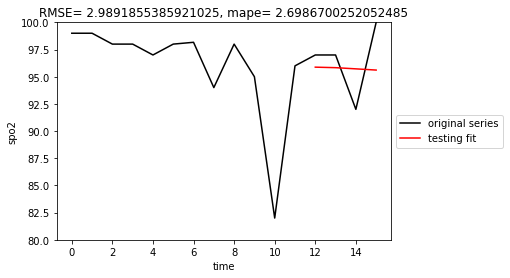

378


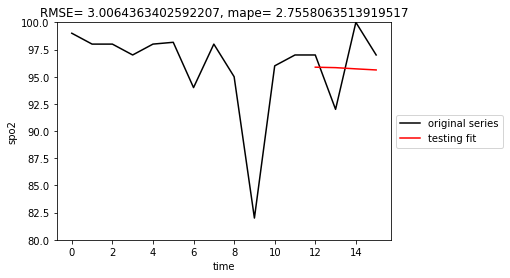

379


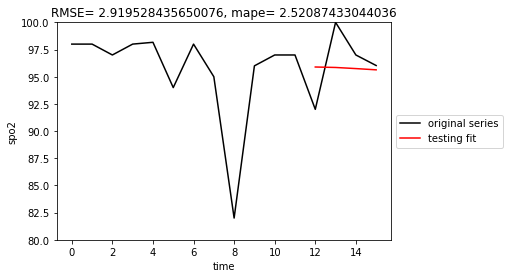

380


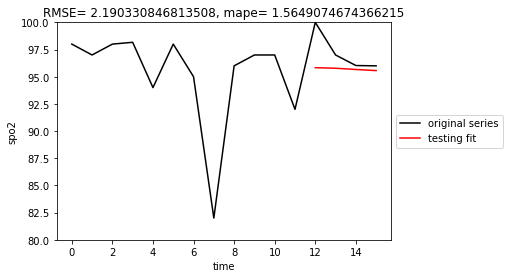

381


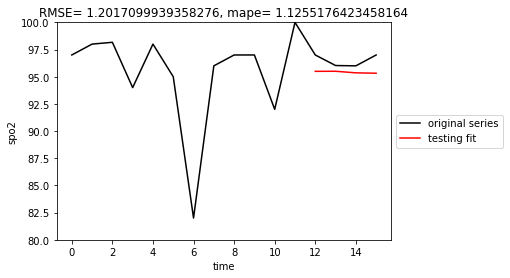

382


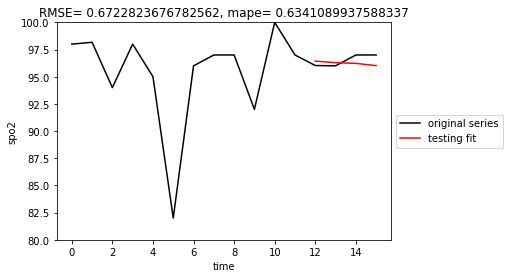

383


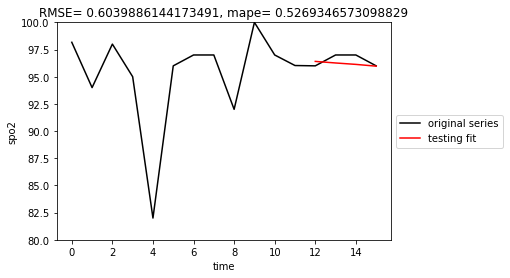

384


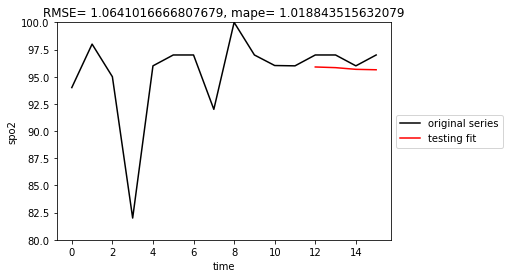

In [27]:
for prediction in range(371,385):
    print(prediction)
    evaluate_plot(dataset_reduced, test_gen, test_predict,
                  target_variable=target_variable, metric=mape,
                  prediction=prediction)

In [28]:
hyperparameters_losses

{'regularization_rate': 0.0002,
 'learning_rate': 0.003,
 'filters': [],
 'lstm_dims': [17]}